# classification

* predict if patient will have hearing disease

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


### exploratory data analysis

In [3]:
# get the columns
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.tail()

,age,physical_score,test_result
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1
4999,48.0,38.5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


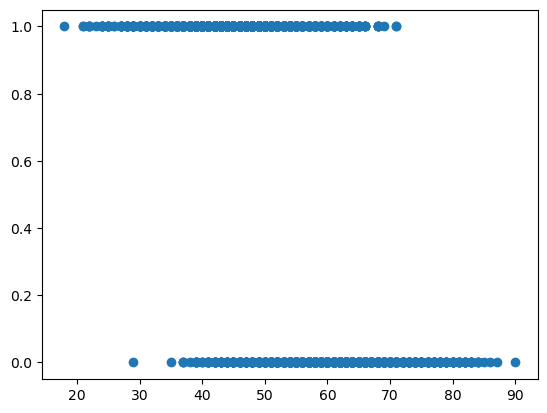

In [8]:
plt.scatter(df['age'], df['test_result'])

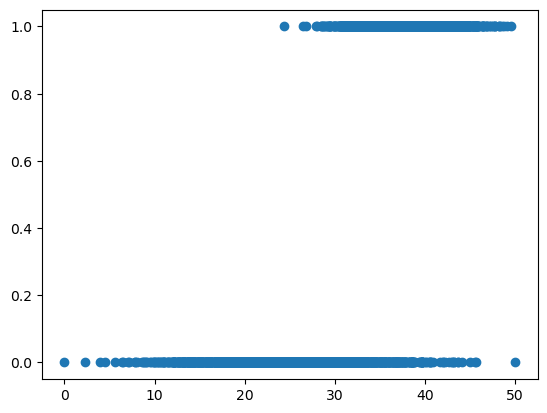

In [9]:
plt.scatter(df['physical_score'], df['test_result'])

In [10]:
# find the correlation between the columns
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


### data cleansing

* no cleansing is needed

### split the data

In [11]:
# create x
x = df.drop('test_result', axis= 1)

# create y 
y = df['test_result']

In [12]:
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 213124)

### build the model

In [14]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV()

# build the model
model.fit(x_train, y_train)

LogisticRegressionCV()

### model evaluation

In [16]:
# get the prediction for x_test
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[359,  48],
       [ 38, 555]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

# get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.914

In [20]:
y_pred[1]

1

In [21]:
y_test

1494    0
1617    1
48      1
3599    1
1236    1
       ..
2908    0
2792    1
1937    0
1474    1
63      0
Name: test_result, Length: 1000, dtype: int64